In [1]:
# Importar  bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# Cargar el dataset
data = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Explorar los primeros datos
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
# Eliminar filas con valores faltantes
data = data.dropna()

# Dividir en características X y objetivo y
X = data.drop('median_house_value', axis=1)  # Características
y = data['median_house_value']  # Objetivo: Precio de la casa


In [7]:
# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)


LinearRegression()

In [9]:
# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)


In [10]:
# Calcular las métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 49983.47465122931
Mean Squared Error (MSE): 4634658406.223264
Root Mean Squared Error (RMSE): 68078.32552452553
R-squared (R2): 0.6636396350243869


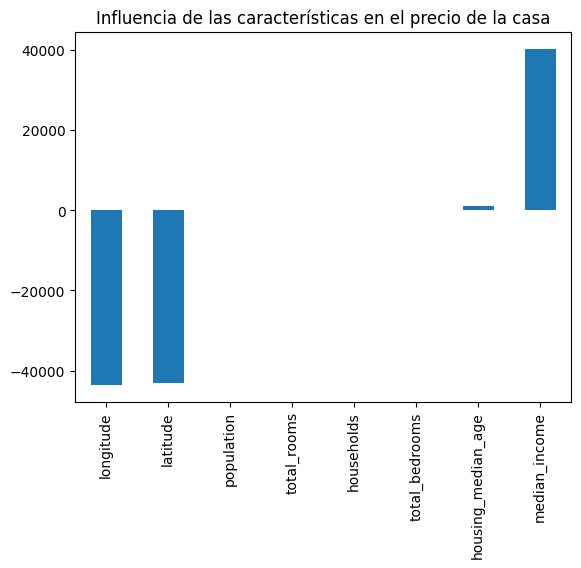

In [11]:
# Mostrar los coeficientes del modelo entrenado
coefficients = pd.Series(model.coef_, X.columns)

# Ordenar de mayor a menor impacto
coefficients = coefficients.sort_values()

# Visualizar los coeficientes
coefficients.plot(kind='bar')
plt.title("Influencia de las características en el precio de la casa")
plt.show()
